In [157]:
from flask import Flask, render_template, url_for
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
from sklearn import svm
from sklearn.metrics import accuracy_score

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [158]:
# Load Data

sentiment = pd.read_csv('data_labeling_new.csv')

In [159]:
sentiment

,Unnamed: 0,tweet_text,text,text_processed,polarity,sentimen
0,1,Jika revolusi BBM ke Listrik ini berhasil.Peme...,if the fuel-to-electricity revolution is succe...,"fuel-to-electricity revolution successful, gov...",0.750000,positive
1,8,"Guna memastikan ketersediaan BBM bersubsidi, p...",In order to ensure the availability of subsidi...,In order ensure availability subsidized fuel o...,0.200000,positive
2,10,Pemerintah tambah subsidi BBM hingga akhir tah...,the government will add fuel subsidies until t...,government add fuel subsidy end year governmen...,0.064286,positive
3,11,"Banyak yg gak suka bahkan benci dg pemerintah,...","many do not like and even hate the government,...","many like even hate government, BLT social ass...",0.058333,positive
4,12,Penyesuaian harga BBM ini diambil pemerintah d...,the government made adjustments to the price o...,government made adjustment price fuel oil many...,0.066667,positive
...,...,...,...,...,...,...
1500,4162,Realisasi BLT BBM hampir 100%. Wahhh. Kerenn P...,the realization of direct fuel oil cash assist...,realization direct fuel oil cash assistance al...,0.100000,positive
1501,4163,Mari sama2 kita dukung penyesuaian harga BBM. ...,let's all support the adjustment of fuel price...,let's support adjustment fuel price due adjust...,-0.125000,negative
1502,4164,Masyarakat sudah menerima BLT BBM yang disalur...,the community has received direct fuel oil cas...,community received direct fuel oil cash assist...,0.100000,positive
1503,4165,Orang kaya paling menikmati subsidi BBM. Ini y...,the rich enjoy the fuel subsidies the most whi...,"rich enjoy fuel subsidy make fuel scarce, ther...",0.475000,positive


In [160]:
sentiment = sentiment.drop(['Unnamed: 0','text'], axis=1)
sentiment.head()

,tweet_text,text_processed,polarity,sentimen
0,Jika revolusi BBM ke Listrik ini berhasil.Peme...,"fuel-to-electricity revolution successful, gov...",0.750000,positive
1,"Guna memastikan ketersediaan BBM bersubsidi, p...",In order ensure availability subsidized fuel o...,0.200000,positive
2,Pemerintah tambah subsidi BBM hingga akhir tah...,government add fuel subsidy end year governmen...,0.064286,positive
3,"Banyak yg gak suka bahkan benci dg pemerintah,...","many like even hate government, BLT social ass...",0.058333,positive
4,Penyesuaian harga BBM ini diambil pemerintah d...,government made adjustment price fuel oil many...,0.066667,positive


In [161]:
sentiment

,tweet_text,text_processed,polarity,sentimen
0,Jika revolusi BBM ke Listrik ini berhasil.Peme...,"fuel-to-electricity revolution successful, gov...",0.750000,positive
1,"Guna memastikan ketersediaan BBM bersubsidi, p...",In order ensure availability subsidized fuel o...,0.200000,positive
2,Pemerintah tambah subsidi BBM hingga akhir tah...,government add fuel subsidy end year governmen...,0.064286,positive
3,"Banyak yg gak suka bahkan benci dg pemerintah,...","many like even hate government, BLT social ass...",0.058333,positive
4,Penyesuaian harga BBM ini diambil pemerintah d...,government made adjustment price fuel oil many...,0.066667,positive
...,...,...,...,...
1500,Realisasi BLT BBM hampir 100%. Wahhh. Kerenn P...,realization direct fuel oil cash assistance al...,0.100000,positive
1501,Mari sama2 kita dukung penyesuaian harga BBM. ...,let's support adjustment fuel price due adjust...,-0.125000,negative
1502,Masyarakat sudah menerima BLT BBM yang disalur...,community received direct fuel oil cash assist...,0.100000,positive
1503,Orang kaya paling menikmati subsidi BBM. Ini y...,"rich enjoy fuel subsidy make fuel scarce, ther...",0.475000,positive


In [162]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(sentiment['text_processed'], sentiment['sentimen'], test_size = 0.1, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama

In [163]:
df_train90 = pd.DataFrame()
df_train90['tweet'] = train_X
df_train90['sentimen'] = train_Y

df_test10 = pd.DataFrame()
df_test10['tweet'] = test_X
df_test10['sentimen'] = test_Y

In [164]:
df_train90

,tweet,sentimen
648,The government ensures direct cash assistance ...,positive
1097,government continues distribute direct cash as...,positive
22,government chooses path justice defeating fuel...,positive
751,"Thank you, government provided direct cash ass...",positive
254,"thanks social assistance program, grassroots e...",positive
...,...,...
763,"thank God, finally government started distribu...",positive
835,adjusting price fuel oil fulfill principle jus...,positive
1216,price fuel oil must adjusted currently global ...,positive
559,The government's adjustment fuel price correct...,negative


In [165]:
df_test10

,tweet,sentimen
968,fuel oil direct cash assistance government soc...,positive
9,"Even though fuel oil quota added, BPH Oil Gas ...",negative
1470,"fuel subsidy widely enjoyed rich, government a...",positive
1150,stop jokowi useless can't handle anything can'...,negative
880,apart saying quality Pertamina's product decre...,positive
...,...,...
1487,government distributes direct fuel oil cash as...,positive
996,The people East Nusa Tenggara support governme...,positive
309,trending fuel price go inflation skyrocketed p...,positive
892,"testimony various people, still many luxury ve...",positive


In [166]:

df_train90.to_csv('df_train90_textblob_.csv')
df_test10.to_csv('df_test10_textblob_.csv')


In [167]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_9010 = TfidfVectorizer(max_features = 5000)
tfidf_vect_9010.fit(sentiment['text_processed'])
train_X_tfidf_9010 = tfidf_vect_9010.transform(df_train90['tweet'])
test_X_tfidf_9010 = tfidf_vect_9010.transform(df_test10['tweet'])

In [168]:
tfidf_vect_9010

TfidfVectorizer(max_features=5000)

In [169]:
print(train_X_tfidf_9010)

  (0, 1995)	0.2205078987716654
  (0, 1861)	0.41624180439885494
  (0, 1403)	0.40334079161982284
  (0, 1307)	0.10322714384694391
  (0, 1285)	0.40334079161982284
  (0, 1101)	0.42626617231927144
  (0, 1004)	0.2578254717670559
  (0, 821)	0.07648013031579581
  (0, 780)	0.07673452312182454
  (0, 635)	0.3553642632801646
  (0, 526)	0.13907879846399834
  (0, 316)	0.13826469487533694
  (0, 160)	0.1320514168003731
  (1, 821)	0.1051147947391015
  (1, 780)	0.10546443388692196
  (1, 546)	0.5599328101901329
  (1, 526)	0.19115081646356277
  (1, 425)	0.4884149835789651
  (1, 316)	0.1900319071303129
  (1, 184)	0.5658303246647247
  (1, 160)	0.18149233682871926
  (2, 2016)	0.23739430376077486
  (2, 1980)	0.2582455512677435
  (2, 1911)	0.09915690469467689
  (2, 1783)	0.24313794796764013
  :	:
  (1352, 1995)	0.18868091472059792
  (1352, 1911)	0.1709457539439933
  (1352, 1470)	0.4191679838706677
  (1352, 1464)	0.1198103506166752
  (1352, 821)	0.06544137886360894
  (1352, 819)	0.338695695943647
  (1352, 780)	0

In [170]:
print(train_X_tfidf_9010.shape)
print(test_X_tfidf_9010.shape)

(1354, 2198)
(151, 2198)


In [171]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_9010.vocabulary_)

{'fuel': 780, 'to': 2017, 'electricity': 613, 'revolution': 1655, 'successful': 1914, 'government': 821, 'obliged': 1294, 'monitor': 1212, 'supply': 1928, 'receipt': 1567, 'market': 1157, 'become': 210, 'over': 1334, 'purwono': 1523, 'in': 942, 'order': 1329, 'ensure': 633, 'availability': 173, 'subsidized': 1908, 'oil': 1307, 'officially': 1305, 'increased': 950, 'pertalite': 1401, 'diesel': 519, 'quota': 1533, 'october': 1298, 'addition': 40, 'much': 1232, 'million': 1188, 'kl': 1046, 'add': 37, 'subsidy': 1911, 'end': 627, 'year': 2188, 'plan': 1411, 'increase': 949, 'kiloliter': 1041, 'ministry': 1194, 'energy': 628, 'mineral': 1191, 'resources': 1631, 'also': 96, 'ensures': 635, 'purchase': 1520, 'limited': 1096, 'target': 1967, 'many': 1156, 'like': 1093, 'even': 656, 'hate': 861, 'blt': 248, 'social': 1810, 'assistance': 160, 'pre': 1448, 'employment': 622, 'queued': 1527, 'front': 777, 'that': 1994, 'made': 1130, 'adjustment': 46, 'price': 1464, 'review': 1647, 'process': 1476,

# SVM

# K=1

In [172]:
# Proses Pelatihan

from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors= 1)
knn1.fit(train_X_tfidf_9010,train_Y)
pred1 = knn1.predict(test_X_tfidf_9010)

In [173]:
# Proses Pengujian

from sklearn.metrics import accuracy_score

test_prediction_9010_k1 = pd.DataFrame()
test_prediction_9010_k1['text'] = test_X
test_prediction_9010_k1['sentimen'] = pred1
k1_accuracy_9010_linier = accuracy_score(pred1, test_Y)*100
k1_accuracy_9010_linier = round(k1_accuracy_9010_linier,1)

In [174]:
test_prediction_9010_k1.to_csv('test_prediction_9010_textblob_linier.csv')

In [175]:
k1_accuracy_9010_linier

89.4

# K=3

In [176]:
knn3 = KNeighborsClassifier(n_neighbors= 3)
knn3.fit(train_X_tfidf_9010,train_Y)
pred3 = knn3.predict(test_X_tfidf_9010)

In [177]:
from sklearn.metrics import accuracy_score
test_prediction_9010_k3 = pd.DataFrame()
test_prediction_9010_k3['text'] = test_X
test_prediction_9010_k3['sentimen'] = pred3
k3_accuracy_9010_linier = accuracy_score(pred3, test_Y)*100
k3_accuracy_9010_linier = round(k3_accuracy_9010_linier,1)

In [178]:
k3_accuracy_9010_linier

92.7

# K=5

In [179]:
knn5 = KNeighborsClassifier(n_neighbors= 5)
knn5.fit(train_X_tfidf_9010,train_Y)
pred5 = knn5.predict(test_X_tfidf_9010)

In [180]:
test_prediction_9010_k5 = pd.DataFrame()
test_prediction_9010_k5['text'] = test_X
test_prediction_9010_k5['sentimen'] = pred5
k5_accuracy_9010_linier = accuracy_score(pred5, test_Y)*100
k5_accuracy_9010_linier = round(k5_accuracy_9010_linier,1)

In [181]:
k5_accuracy_9010_linier

92.1

# K=7

In [182]:
knn7 = KNeighborsClassifier(n_neighbors= 7)
knn7.fit(train_X_tfidf_9010,train_Y)
pred7 = knn7.predict(test_X_tfidf_9010)

In [183]:
test_prediction_9010_k7 = pd.DataFrame()
test_prediction_9010_k7['text'] = test_X
test_prediction_9010_k7['sentimen'] = pred7
k7_accuracy_9010_linier = accuracy_score(pred7, test_Y)*100
k7_accuracy_9010_linier = round(k7_accuracy_9010_linier,1)

In [184]:
test_prediction_9010_k7.to_csv('test_prediction_9010_textblob_k7.csv')

In [185]:
k7_accuracy_9010_linier

90.7

In [186]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print ("\nHere is the classification report:") 

print ("K1 "+classification_report(test_Y, pred1))
print ("K3 "+classification_report(test_Y, pred3))
print ("K5 "+classification_report(test_Y, pred5))
print ("K7 "+classification_report(test_Y, pred7))


Here is the classification report:
K1               precision    recall  f1-score   support

    negative       0.73      0.62      0.67        26
    positive       0.92      0.95      0.94       125

    accuracy                           0.89       151
   macro avg       0.82      0.78      0.80       151
weighted avg       0.89      0.89      0.89       151

K3               precision    recall  f1-score   support

    negative       0.94      0.62      0.74        26
    positive       0.93      0.99      0.96       125

    accuracy                           0.93       151
   macro avg       0.93      0.80      0.85       151
weighted avg       0.93      0.93      0.92       151

K5               precision    recall  f1-score   support

    negative       1.00      0.54      0.70        26
    positive       0.91      1.00      0.95       125

    accuracy                           0.92       151
   macro avg       0.96      0.77      0.83       151
weighted avg       0.93      

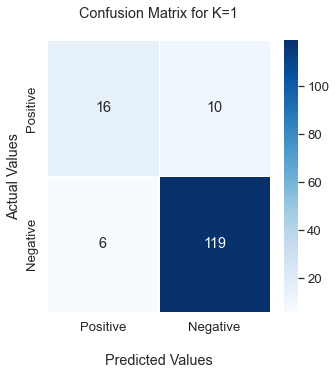

<Figure size 432x288 with 0 Axes>

In [187]:

from sklearn.metrics import classification_report, confusion_matrix
# Confusion metrics NB
k1_cm = confusion_matrix(test_Y, pred1)

plt.figure(figsize = (5, 5))
k1_ax = sns.heatmap(k1_cm, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['Positive', 'Negative'],
                    yticklabels = ['Positive', 'Negative'])
k1_ax.set_title("Confusion Matrix for K=1\n")
k1_ax.set_xlabel("\nPredicted Values")
k1_ax.set_ylabel("Actual Values")
plt.show()
plt.savefig('confussion_matrix_k1.png')

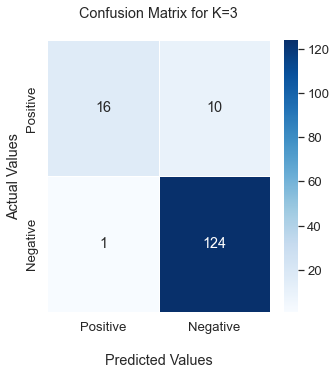

<Figure size 432x288 with 0 Axes>

In [188]:
k3_cm = confusion_matrix(test_Y, pred3)

plt.figure(figsize = (5, 5))
k3_ax = sns.heatmap(k3_cm, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['Positive', 'Negative'],
                    yticklabels = ['Positive', 'Negative'])
k3_ax.set_title("Confusion Matrix for K=3\n")
k3_ax.set_xlabel("\nPredicted Values")
k3_ax.set_ylabel("Actual Values")
plt.show()
plt.savefig('confussion_matrix_k3.png')

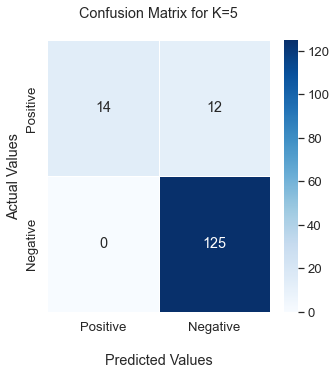

<Figure size 432x288 with 0 Axes>

In [189]:
k5_cm = confusion_matrix(test_Y, pred5)

plt.figure(figsize = (5, 5))
k5_ax = sns.heatmap(k5_cm, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['Positive', 'Negative'],
                    yticklabels = ['Positive', 'Negative'])
k5_ax.set_title("Confusion Matrix for K=5\n")
k5_ax.set_xlabel("\nPredicted Values")
k5_ax.set_ylabel("Actual Values")
plt.show()
plt.savefig('confussion_matrix_k5.png')

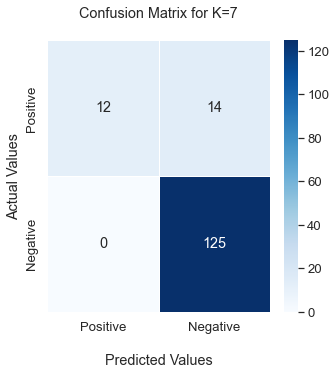

<Figure size 432x288 with 0 Axes>

In [190]:
k7_cm = confusion_matrix(test_Y, pred7)

plt.figure(figsize = (5, 5))
k7_ax = sns.heatmap(k7_cm, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['Positive', 'Negative'],
                    yticklabels = ['Positive', 'Negative'])
k7_ax.set_title("Confusion Matrix for K=7\n")
k7_ax.set_xlabel("\nPredicted Values")
k7_ax.set_ylabel("Actual Values")
plt.show()
plt.savefig('confussion_matrix_k7.png')

### Bar and Pie Plot

In [191]:
print(sentiment['sentimen'].value_counts())

positive    1244
negative     261
Name: sentimen, dtype: int64


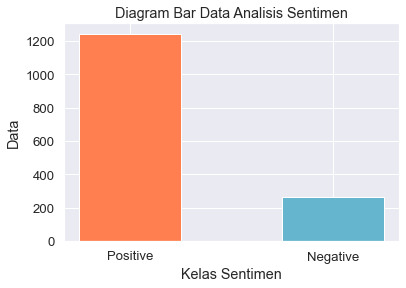

In [192]:
#Bar plot for  reviews

labels = ['Positive','Negative']
all_counts= sentiment['sentimen'].value_counts()
plt.bar(labels, all_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar Data Analisis Sentimen')
plt.savefig('bar_data_Sentimen.png')
plt.show()

([<matplotlib.patches.Wedge at 0x23f2037f280>,
 [Text(-0.5700915419981648, -0.9407420654686144, 'positive'),
  Text(0.5700914979588495, 0.9407420921565247, 'negative')],
 [Text(-0.31095902290808985, -0.5131320357101533, '82.7%'),
  Text(0.3109589988866452, 0.5131320502671952, '17.3%')])

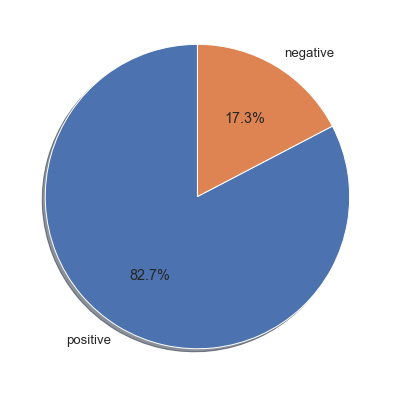

In [193]:
#pie chart for reviews
all_counts= sentiment['sentimen'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(all_counts.values, labels = all_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
# plt.legend()

In [194]:
print(df_train90['sentimen'].value_counts())

positive    1119
negative     235
Name: sentimen, dtype: int64


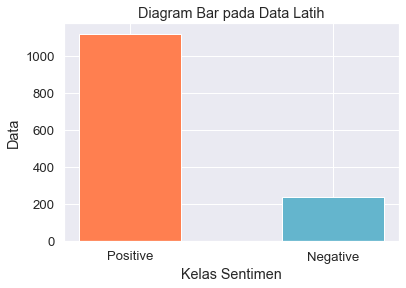

In [195]:
#Bar plot for Train Set

labels = ['Positive','Negative']
train_counts= df_train90['sentimen'].value_counts()
plt.bar(labels, train_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Data Latih')
plt.savefig('bar_data_latih.png')
plt.show()

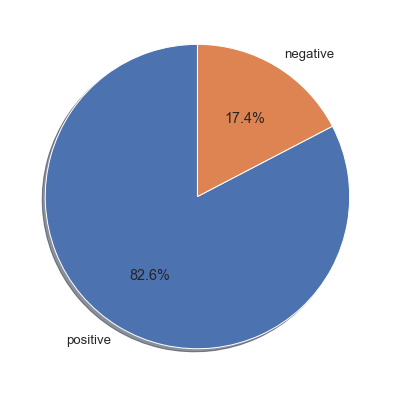

In [196]:
#pie chart for Train Set

train_counts= df_train90['sentimen'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(train_counts.values, labels = train_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.savefig('pie_data_latih.png')
# plt.legend()

In [197]:
print(df_test10['sentimen'].value_counts())

positive    125
negative     26
Name: sentimen, dtype: int64


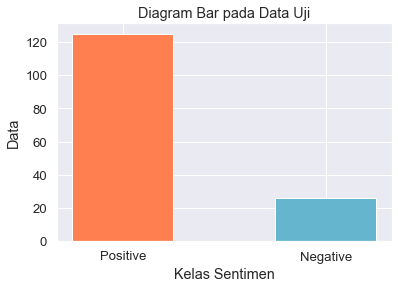

In [198]:
#Bar plot for Test Set


labels = ['Positive','Negative']
test_counts= df_test10['sentimen'].value_counts()
plt.bar(labels, test_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Data Uji')
plt.savefig('bar_data_uji.png')
plt.show()

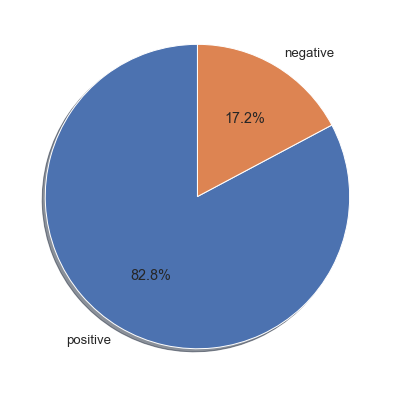

In [199]:
#pie chart for Test Set

test_counts= df_test10['sentimen'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(test_counts.values, labels = test_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.savefig('pie_data_uji.png')
# plt.legend()

In [200]:
print(test_prediction_9010_k1['sentimen'].value_counts())

positive    129
negative     22
Name: sentimen, dtype: int64


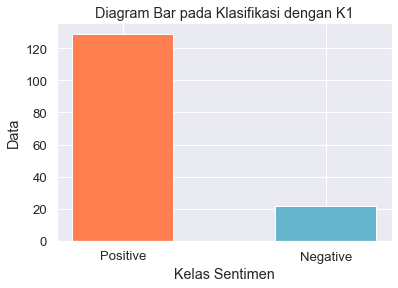

In [201]:
#Bar plot for Klasifikasi dengan SVM

labels = ['Positive','Negative']
k1_counts= test_prediction_9010_k1['sentimen'].value_counts()
plt.bar(labels, k1_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan K1')
plt.savefig('bar_k1.png')
plt.show()

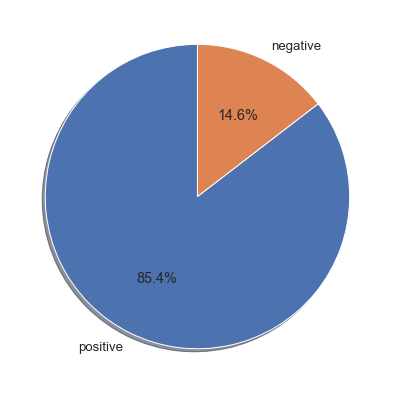

In [202]:
#pie chart for Klasifikasi dengan SVM
k1_counts= test_prediction_9010_k1['sentimen'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(k1_counts, labels = k1_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.savefig('pie_k1_Textblob.png')
# plt.legend()

In [203]:
print(test_prediction_9010_k3['sentimen'].value_counts())

positive    134
negative     17
Name: sentimen, dtype: int64


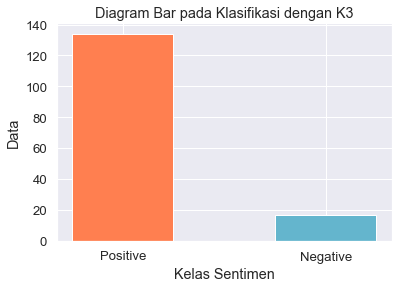

In [204]:
labels = ['Positive','Negative']
k3_counts= test_prediction_9010_k3['sentimen'].value_counts()
plt.bar(labels, k3_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan K3')
plt.savefig('bar_k3.png')
plt.show()

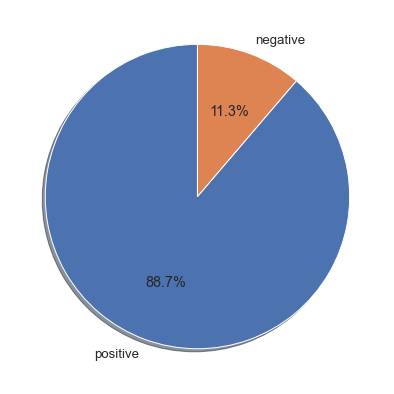

In [205]:
k3_counts= test_prediction_9010_k3['sentimen'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(k3_counts, labels = k3_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.savefig('pie_k3_Textblob.png')

In [206]:
print(test_prediction_9010_k5['sentimen'].value_counts())

positive    137
negative     14
Name: sentimen, dtype: int64


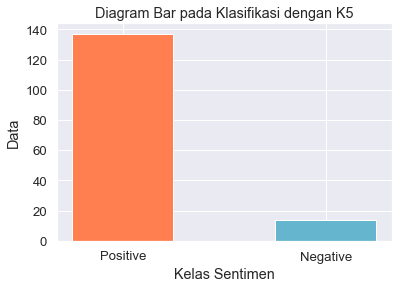

In [207]:
labels = ['Positive','Negative']
k5_counts= test_prediction_9010_k5['sentimen'].value_counts()
plt.bar(labels, k5_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan K5')
plt.savefig('bar_k5.png')
plt.show()

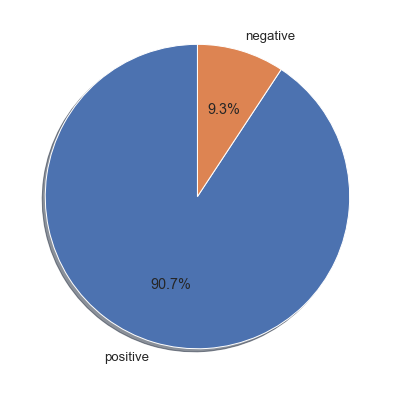

In [208]:
k5_counts= test_prediction_9010_k5['sentimen'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(k5_counts, labels = k5_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.savefig('pie_k5_Textblob.png')

In [209]:
print(test_prediction_9010_k7['sentimen'].value_counts())

positive    139
negative     12
Name: sentimen, dtype: int64


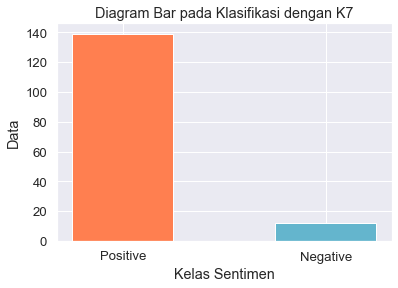

In [210]:
labels = ['Positive','Negative']
k7_counts= test_prediction_9010_k7['sentimen'].value_counts()
plt.bar(labels, k7_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan K7')
plt.savefig('bar_k7.png')
plt.show()

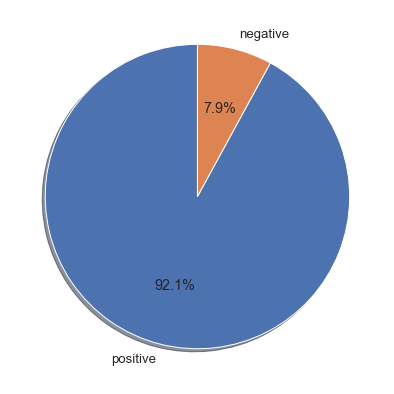

In [211]:
k7_counts= test_prediction_9010_k7['sentimen'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(k7_counts, labels = k7_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.savefig('pie_k7_Textblob.png')

In [212]:
print ("K1 "+classification_report(test_Y, pred1))
print ("K3 "+classification_report(test_Y, pred3))
print ("K5 "+classification_report(test_Y, pred5))
print ("K7 "+classification_report(test_Y, pred7))

K1               precision    recall  f1-score   support

    negative       0.73      0.62      0.67        26
    positive       0.92      0.95      0.94       125

    accuracy                           0.89       151
   macro avg       0.82      0.78      0.80       151
weighted avg       0.89      0.89      0.89       151

K3               precision    recall  f1-score   support

    negative       0.94      0.62      0.74        26
    positive       0.93      0.99      0.96       125

    accuracy                           0.93       151
   macro avg       0.93      0.80      0.85       151
weighted avg       0.93      0.93      0.92       151

K5               precision    recall  f1-score   support

    negative       1.00      0.54      0.70        26
    positive       0.91      1.00      0.95       125

    accuracy                           0.92       151
   macro avg       0.96      0.77      0.83       151
weighted avg       0.93      0.92      0.91       151

K7        

In [213]:
print(test_prediction_9010_k1['sentimen'].value_counts())
print(test_prediction_9010_k3['sentimen'].value_counts())
print(test_prediction_9010_k5['sentimen'].value_counts())
print(test_prediction_9010_k7['sentimen'].value_counts())

positive    129
negative     22
Name: sentimen, dtype: int64
positive    134
negative     17
Name: sentimen, dtype: int64
positive    137
negative     14
Name: sentimen, dtype: int64
positive    139
negative     12
Name: sentimen, dtype: int64


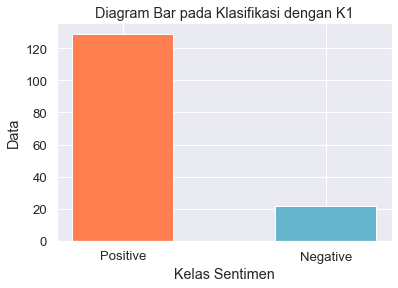

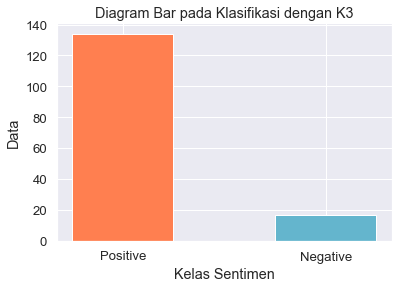

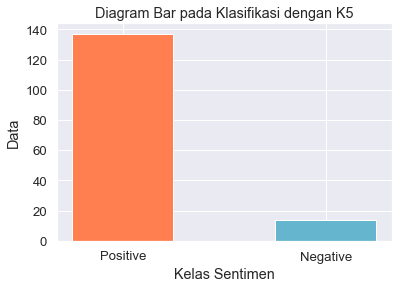

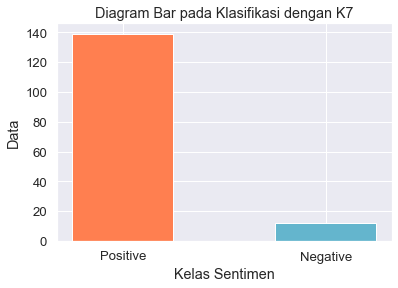

<Figure size 432x288 with 0 Axes>

In [214]:
labels = ['Positive','Negative']
k1_counts= test_prediction_9010_k1['sentimen'].value_counts()
plt.bar(labels, k1_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan K1')
plt.show()

labels = ['Positive','Negative']
k3_counts= test_prediction_9010_k3['sentimen'].value_counts()
plt.bar(labels, k3_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan K3')
plt.show()

labels = ['Positive','Negative']
k5_counts= test_prediction_9010_k5['sentimen'].value_counts()
plt.bar(labels, k5_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan K5')
plt.show()

labels = ['Positive','Negative']
k7_counts= test_prediction_9010_k7['sentimen'].value_counts()
plt.bar(labels, k7_counts, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan K7')
plt.show()

plt.savefig('chart_data.png')

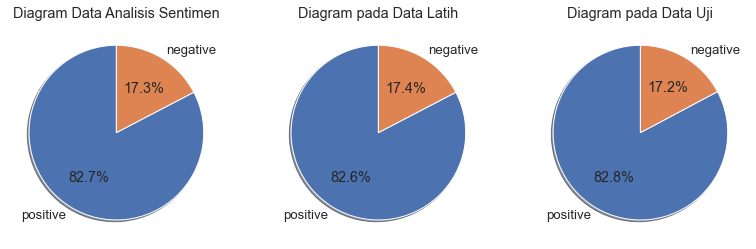

In [215]:
plt.figure(figsize=(18,7))
plt.subplot(1,4,1)
plt.title('Diagram Data Analisis Sentimen')
plt.pie(all_counts.values, labels = all_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.subplot(1,4,2)
plt.title('Diagram pada Data Latih')
plt.pie(train_counts.values, labels = train_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.subplot(1,4,3)
plt.title('Diagram pada Data Uji')
plt.pie(test_counts.values, labels = test_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.savefig('pie_data.png')

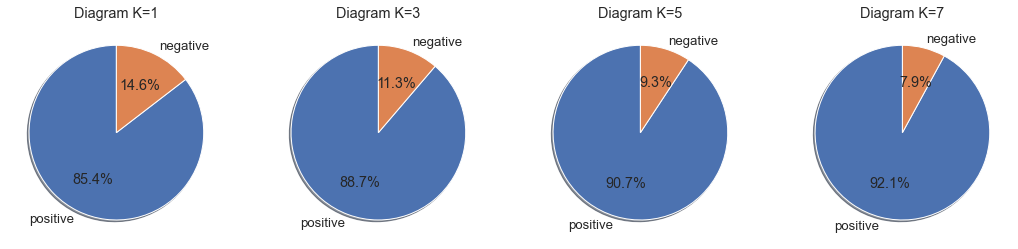

In [216]:
plt.figure(figsize=(18,7))
plt.subplot(1,4,1)
plt.title('Diagram K=1')
plt.pie(k1_counts.values, labels = k1_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.subplot(1,4,2)
plt.title('Diagram K=3')
plt.pie(k3_counts.values, labels = k3_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.subplot(1,4,3)
plt.title('Diagram K=5')
plt.pie(k5_counts.values, labels = k5_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.subplot(1,4,4)
plt.title('Diagram K=7')
plt.pie(k7_counts.values, labels = k7_counts.index,startangle=90, autopct='%1.1f%%', shadow=True)
plt.savefig('pie_knn.png')


In [217]:
d = sentiment["lemmatize"]

KeyError: 'lemmatize'

In [ ]:
# Removing whitespaces by splitting cleaned_tweet for counter
def split_name(tweet_text):
    split = str(tweet_text).split()
    return split

# Store the data in a list for text visualization
tweets_count_list = []
for x in d:
    for y in split_name(x):
        tweets_count_list.append(y)

In [ ]:
# Plot the word cloud 
from wordcloud import WordCloud
plt.figure(figsize=(15,7))
allWords = ' '.join([twts for twts in d])
wordCloud = WordCloud(background_color='white', width=1920, height=1080, random_state = 21, max_font_size=150).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig('cleaned_tweet_wordcloud.png')
plt.show()